In [1]:
# Core libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all plots
sns.set_style("whitegrid")

In [2]:
def plot_decision_boundaries(X, y, model, title):
    """
    Visualizes the decision boundaries of a trained classifier.
    (Corrected version)
    """
    # Create a meshgrid to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

    # Get unique labels and ensure they are a list for the legend function
    unique_labels = np.unique(y)
    if len(unique_labels) == 2:
        legend_labels = ['Class 0', 'Class 1']
    else:
        legend_labels = list(unique_labels.astype(str)) # Convert numpy array to a list

    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
    plt.show()

In [3]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Scale the features
# Feature scaling is crucial for SVMs to perform optimally.
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

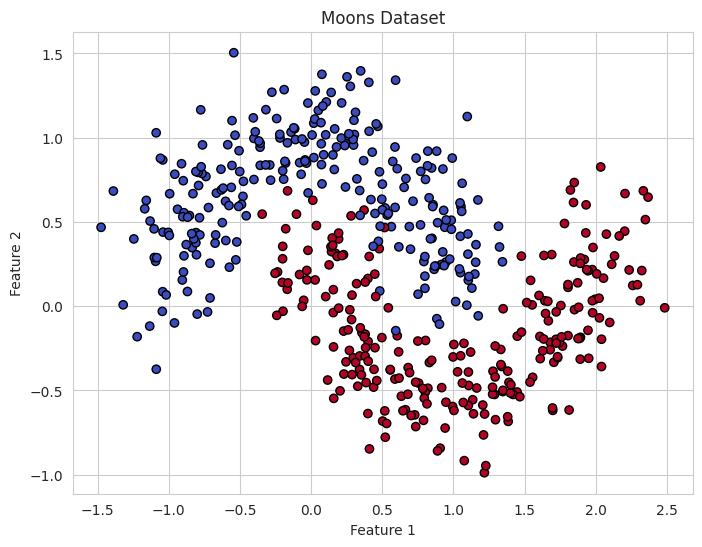

In [4]:
# Visualize the Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()

In [5]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate the moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=42)

# Split into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Standardize features
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

# Train and evaluate SVM models with different kernels
kernels = ['linear', 'rbf', 'poly']
models_moons = {}

for kernel in kernels:
    # Initialize SVM with the current kernel
    svm_model = SVC(kernel=kernel, random_state=42)

    # Train the model
    svm_model.fit(X_train_moons_scaled, y_train_moons)

    # Store the trained model
    models_moons[kernel] = svm_model

    # Make predictions
    y_pred_moons = svm_model.predict(X_test_moons_scaled)

    # Replace <PES1UG23CSXXX> with your SRN
    print(f"SVM with {kernel.upper()} Kernel <PES2UG23CS376>")
    print(classification_report(y_test_moons, y_pred_moons))
    print("-" * 40 + "\n")


SVM with LINEAR Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

----------------------------------------

SVM with RBF Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

----------------------------------------

SVM with POLY Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.

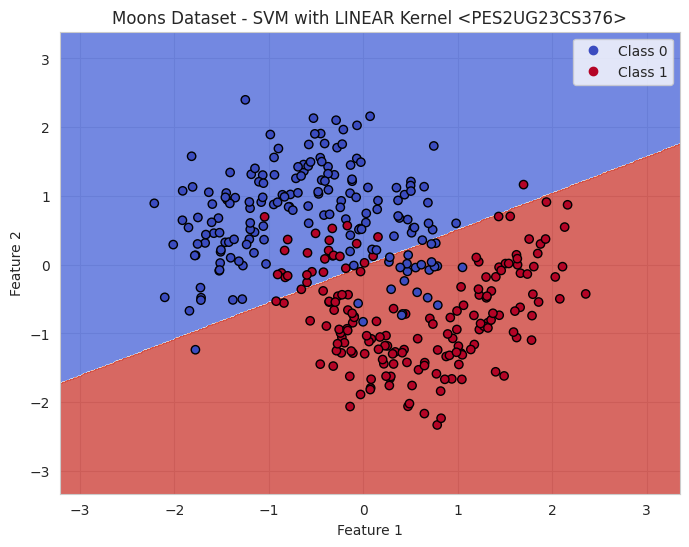

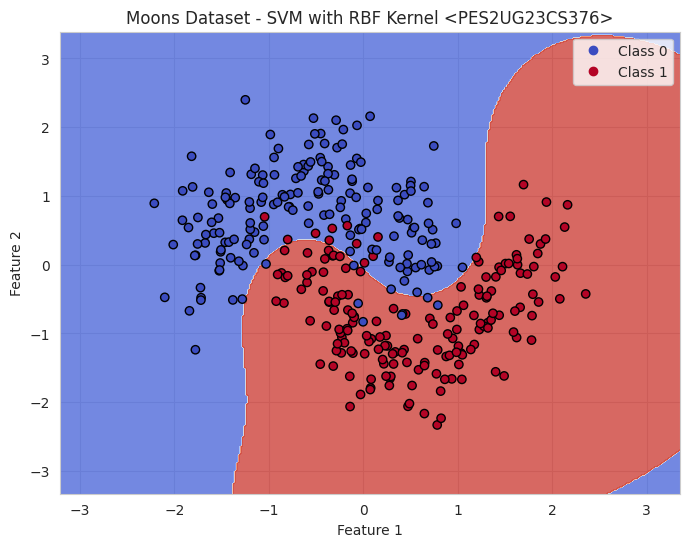

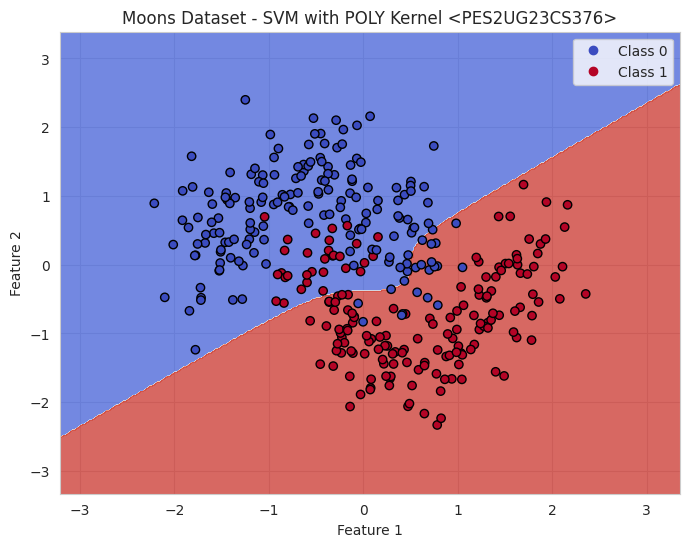

In [6]:
#TODO: Replace with your SRN
for kernel, model in models_moons.items():
    plot_decision_boundaries(
        X_train_moons_scaled,
        y_train_moons,
        model,
        title=f'Moons Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS376>'
    )

### Analysis Questions for Moons:

1. Based on the metrics and the visualizations, what inferences about the performance of the Linear Kernel can you draw?
Answer:- The linear kernel doesn’t perform well because it can’t follow the curved shape of the moons data — its straight boundary misses the pattern, leading to underfitting.


2. Compare the decision boundaries of the RBF and Polynomial kernels. Which one seems to capture the shape of the data more naturally?
Answer:-RBF captures the curved shape more naturally and fits better; polynomial can overfit and is less smooth.

In [7]:
# Load the dataset from a URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
banknote_df = pd.read_csv(url, header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

# Select features and target
X_banknote = banknote_df[['variance', 'skewness']].values
y_banknote = banknote_df['class'].values

# Split data
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = train_test_split(
    X_banknote, y_banknote, test_size=0.3, random_state=42, stratify=y_banknote
)

# Scale features
scaler_banknote = StandardScaler()
X_train_banknote_scaled = scaler_banknote.fit_transform(X_train_banknote)
X_test_banknote_scaled = scaler_banknote.transform(X_test_banknote)

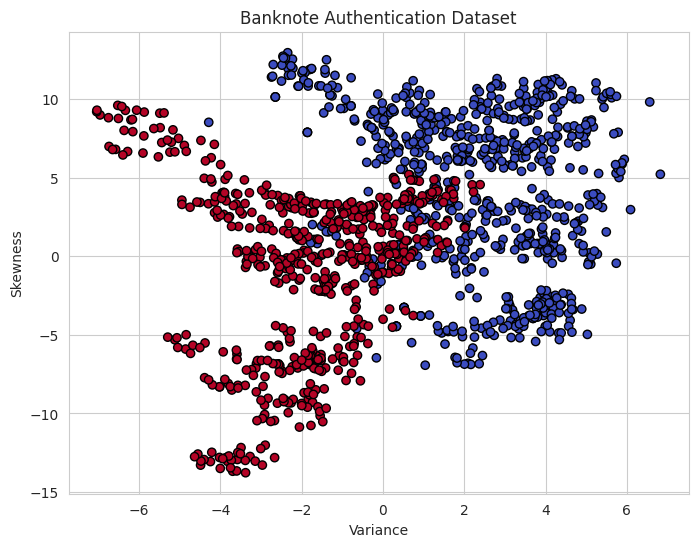

In [8]:
# Visualize the Banknote Authentication dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_banknote[:, 0], X_banknote[:, 1], c=y_banknote, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

models_banknote = {}

for kernel in kernels:
    # Initialize and train the SVM
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_banknote_scaled, y_train_banknote)

    # Store the model
    models_banknote[kernel] = svm_model

    # Make predictions
    y_pred_banknote = svm_model.predict(X_test_banknote_scaled)

    # Replace <PES1UG23CSXXX> with your SRN
    print(f"SVM with {kernel.upper()} Kernel <PES2UG23CS376>")
    print(classification_report(y_test_banknote, y_pred_banknote, target_names=['Forged', 'Genuine']))
    print("-" * 40 + "\n")


SVM with LINEAR Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

      Forged       0.90      0.88      0.89       229
     Genuine       0.86      0.88      0.87       183

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

----------------------------------------

SVM with RBF Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

      Forged       0.96      0.91      0.94       229
     Genuine       0.90      0.96      0.93       183

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412

----------------------------------------

SVM with POLY Kernel <PES2UG23CS376>
              precision    recall  f1-score   support

      Forged       0.82      0.91      0.87       229
     Genuine       0.87      0.75      0.

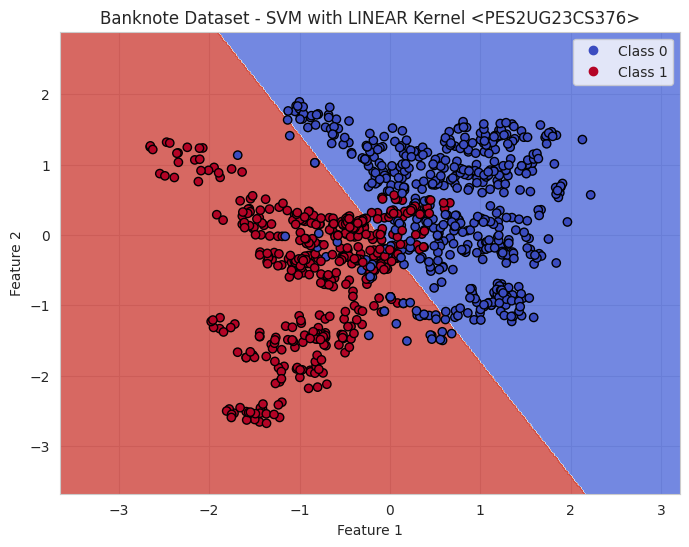

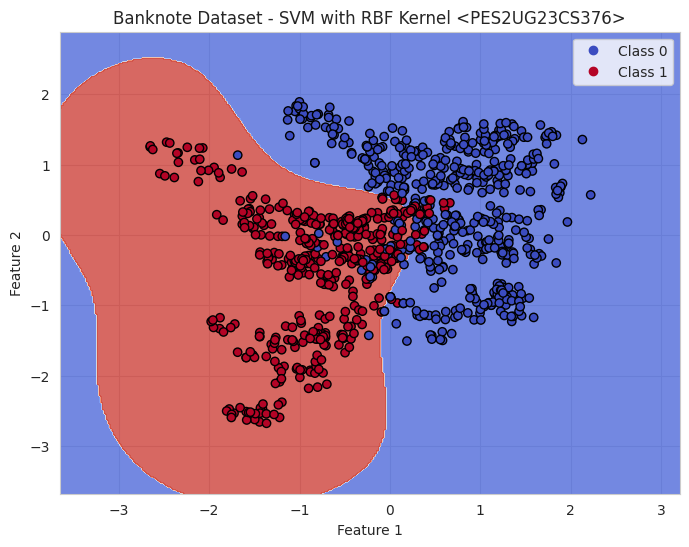

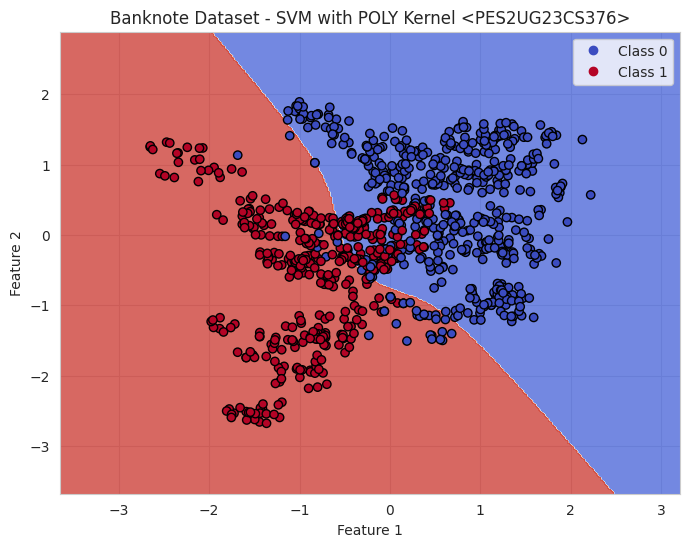

In [10]:
#TODO: Replace with your SRN
for kernel, model in models_banknote.items():
    plot_decision_boundaries(
        X_train_banknote_scaled,
        y_train_banknote,
        model,
        title=f'Banknote Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS376>'
    )

### Analysis Questions for Banknote:
1. In this case, which kernel appears to be the most effective?
Answer:-The linear kernel works best since the banknote data is mostly linearly separable — it gives high accuracy and clean boundaries.
2. The Polynomial kernel shows lower performance here compared to the Moons dataset. What might be the reason for this?
Answer:-The polynomial kernel performs worse because the data doesn’t have complex curved patterns, so it overcomplicates the decision boundary and overfits.

In [11]:
from sklearn.datasets import make_blobs

# Generate linearly separable data with some noise
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Add some outliers
outliers_X = np.array([[0.5, 2.5], [1.5, 0.5]])
outliers_y = np.array([1, 0])
X_linear = np.concatenate([X_linear, outliers_X])
y_linear = np.concatenate([y_linear, outliers_y])


# Split and scale the data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

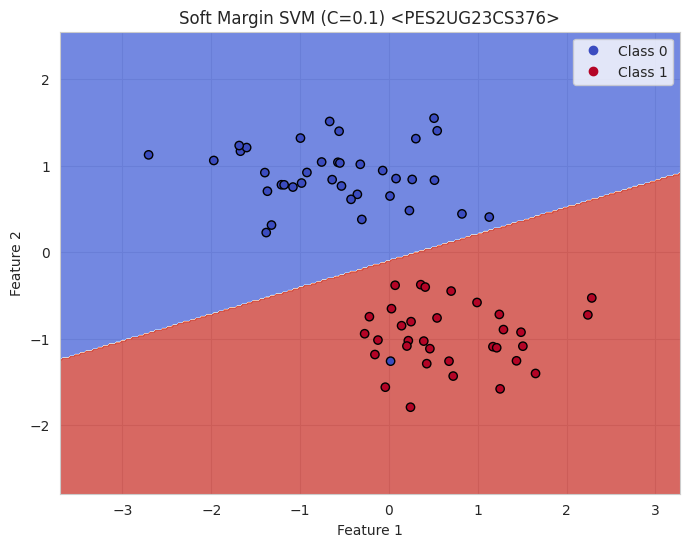

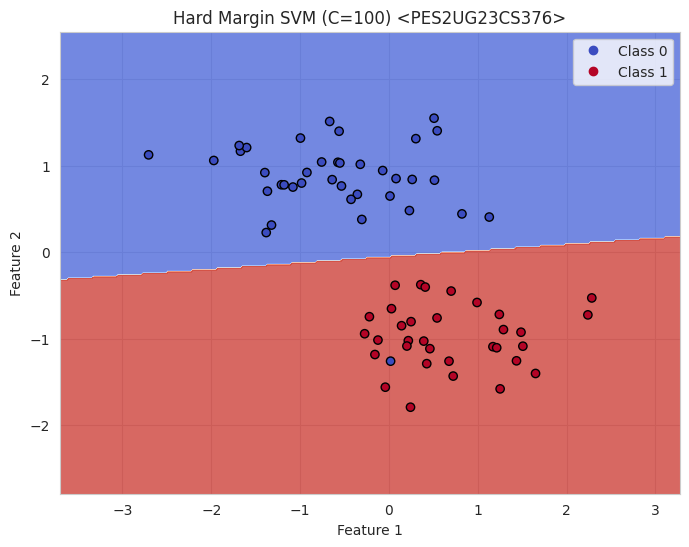

In [12]:
from sklearn.svm import SVC

# Soft Margin SVM (small C)
# Create a linear SVM model with a small C value for a soft margin
svm_soft = SVC(kernel='linear', C=0.1, random_state=42)

# Fit the soft margin model to the training data
svm_soft.fit(X_train_linear_scaled, y_train_linear)

# Replace with your SRN
plot_decision_boundaries(X_train_linear_scaled, y_train_linear, svm_soft,
                         title='Soft Margin SVM (C=0.1) <PES2UG23CS376>')

# Hard Margin SVM (large C)
# Create a linear SVM model with a large C value for a hard margin
svm_hard = SVC(kernel='linear', C=100, random_state=42)

# Fit the hard margin model to the training data
svm_hard.fit(X_train_linear_scaled, y_train_linear)

# Replace with your SRN
plot_decision_boundaries(X_train_linear_scaled, y_train_linear, svm_hard,
                         title='Hard Margin SVM (C=100) <PES2UG23CS376>')


### Analysis Questions

1. Compare the two plots. Which model, the "Soft Margin" (C=0.1) or the "Hard Margin" (C=100), produces a wider margin?
Answer:-The Soft Margin (C=0.1) produces a wider margin. Lower C allows more flexibility.

2. Look closely at the "Soft Margin" (C=0.1) plot. You'll notice some points are either inside the margin or on the wrong side of the decision boundary. Why does the SVM allow these "mistakes"? What is the primary goal of this model?
Answer:-SVM allows some points to be inside or on the wrong side of the margin to avoid overfitting. Its main goal is good generalization, not perfect separation.

3. Which of these two models do you think is more likely to be overfitting to the training data? Explain your reasoning.
Answer:The Hard Margin (C=100) is more likely to overfit because it tries to classify every point correctly, even if it means a very tight margin.

4. Imagine you receive a new, unseen data point. Which model do you trust more to classify it correctly? Why? In a real-world scenario where data is often noisy, which value of C (low or high) would you generally prefer to start with?
Answer:-The Soft Margin is usually more reliable for unseen points. In noisy real-world data, starting with a low C is safer to prevent overfitting.